# Understanding Clemson's 2024 Men's Basketball Playoff Run
### This project aims to use data and statistics to analyze Clemson's improbable NCAA tournament run in March 2024.
### Clemson, the 6-seed, defeated 11-seeded New Mexico, 3-seeded Baylor, and 2-seeded Arizona, before losing to 4-seeded Alabama in the round of 8.
### So why did Clemson perform so well in the playoffs but only earned a 6-seed after the regular season?
### To start, data preprocessing is necessary.

In [2]:
# Import assets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_ind

In [3]:
# Read in the data file
filename = "data/CLEMSON_BASKETBALL_2024_PLAY_BY_PLAY.csv" # File path for basketball data
df = pd.read_csv(filename)

In [4]:
# Split data into regular season and playoffs data
playoffsDf = df.iloc[:1365]
regSeasonDf = df.iloc[1365:]

In [5]:
# Find all different types of events that can occur
event_types = df['type_text'].unique()

In [7]:
# Remove columns that are not statistically significant (timeouts, jumpballs, etc.)
event_types_new = np.delete(event_types, 17)
event_types_new = np.delete(event_types_new, 17)
event_types_new = np.delete(event_types_new, 16)
event_types_new = np.delete(event_types_new, 15)
event_types_new = np.delete(event_types_new, 10)
event_types_new = np.delete(event_types_new, 0)

In [8]:
# Constants representing the number of regular season and playoff games
REG_SEASON_GAMES = 31
PLAYOFF_GAMES = 4

# Create a new DataFrame to store counts of event types
event_countsDf = pd.DataFrame()

# Create a column for type of game (regular season or playoff)
event_countsDf.insert(0, 'GameType', ['Regular Season', 'Playoffs'])

# For each type of event, add a column to this DataFrame
n = len(event_types_new)
for i in range(n):
    regSeason_count = regSeasonDf['type_text'].value_counts()[event_types_new[i]]    # Count how many times this event occurred in the regular season
    playoffs_count = playoffsDf['type_text'].value_counts()[event_types_new[i]]      # Count how many times this event occurred in the playoffs
    event_countsDf.insert(i+1, event_types_new[i], [round(regSeason_count / REG_SEASON_GAMES, 2), round(playoffs_count / PLAYOFF_GAMES, 2)], True)

In [9]:
# View current table
event_countsDf

,GameType,JumpShot,Defensive Rebound,LayUpShot,DunkShot,PersonalFoul,Lost Ball Turnover,Offensive Rebound,TipShot,MadeFreeThrow,Dead Ball Rebound,Block Shot,Steal,ShortTimeOut
0,Regular Season,81.03,53.1,36.29,4.00,32.58,20.03,20.16,0.35,37.52,3.23,6.55,10.90,4.87
1,Playoffs,78.75,54.0,34.00,5.25,36.25,20.25,23.50,3.50,42.75,5.75,6.75,10.75,5.50


In [10]:
# Constants representing the number of regular season and playoff games
REG_SEASON_GAMES = 31
PLAYOFF_GAMES = 4

# Create a new DataFrame to store counts of event types
team_event_countsDf = pd.DataFrame()

# Create a column for type of game (regular season or playoff)
team_event_countsDf.insert(0, 'GameType', ['Clemson Regular Season', 'Clemson Playoffs', 'Opponent Regular Season', 'Opponent Playoffs'])

# For each type of event, add a column to this DataFrame
n = len(event_types_new)
for i in range(n):
    regSeason_count_clemson = regSeasonDf[['type_text', 'team_id']].value_counts()[event_types_new[i]].iloc[0]          # Count how many times this event occurred in the regular season for Clemson
    regSeason_count_opponents = regSeasonDf['type_text'].value_counts()[event_types_new[i]] - regSeason_count_clemson   # Count how many times this event occurred in the regular season for opposing teams
    playoffs_count_clemson = playoffsDf[['type_text', 'team_id']].value_counts()[event_types_new[i]].iloc[0]            # Count how many times this event occurred in the playoffs for Clemson
    playoffs_count_opponents = playoffsDf['type_text'].value_counts()[event_types_new[i]] - playoffs_count_clemson      # Count how many times this event occurred in the regular season for opposing teams

    team_event_countsDf.insert(i+1, event_types_new[i], [
        round(regSeason_count_clemson / REG_SEASON_GAMES, 2), 
        round(regSeason_count_opponents / REG_SEASON_GAMES, 2),
        round(playoffs_count_clemson / PLAYOFF_GAMES, 2),
        round(playoffs_count_opponents / PLAYOFF_GAMES, 2)
    ], True)

In [11]:
# View improved table
team_event_countsDf

,GameType,JumpShot,Defensive Rebound,LayUpShot,DunkShot,PersonalFoul,Lost Ball Turnover,Offensive Rebound,TipShot,MadeFreeThrow,Dead Ball Rebound,Block Shot,Steal,ShortTimeOut
0,Clemson Regular Season,39.77,28.19,18.35,2.32,16.26,10.52,9.94,0.10,18.48,1.26,4.06,4.61,2.35
1,Clemson Playoffs,41.26,24.90,17.94,1.68,16.32,9.52,10.23,0.26,19.03,1.97,2.48,6.29,2.52
2,Opponent Regular Season,40.50,28.50,15.75,2.25,20.00,9.25,8.00,1.00,18.75,2.75,3.00,5.00,3.00
3,Opponent Playoffs,38.25,25.50,18.25,3.00,16.25,11.00,15.50,2.50,24.00,3.00,3.75,5.75,2.50


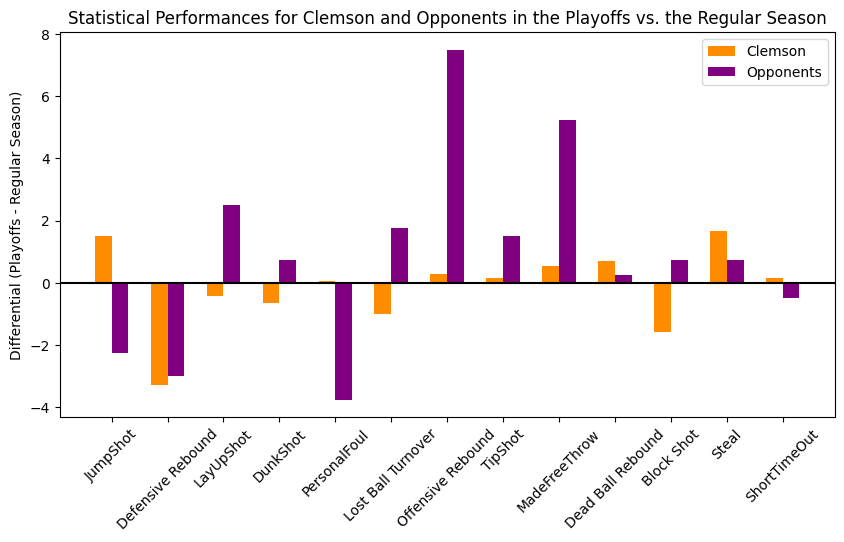

In [12]:
# Create a bar graph to visualize this data
categories = team_event_countsDf.columns[1:]
n = len(categories)

# Use list comprehension to find the differences between playoff and regular season data for Clemson and opponents
clemson_values = [float(round((team_event_countsDf.iloc[1].iloc[x] - team_event_countsDf.iloc[0].iloc[x]), 2)) for x in range(1, n+1)]
opponent_values = [float(round((team_event_countsDf.iloc[3].iloc[x] - team_event_countsDf.iloc[2].iloc[x]), 2)) for x in range(1, n+1)]

# Set the width and x-positions each bar in the graph, as well as create the figure and axes
width = 0.3
x = np.arange(n)
fig, ax = plt.subplots(figsize=(10, 5))

# Create the sets of bars
clemson_bars = ax.bar(x - width / 2, clemson_values, width, color='darkorange', label = 'Clemson')
opponent_bars = ax.bar(x + width / 2, opponent_values, width, color='purple', label = 'Opponents')

# Set labels, title, and legend
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.axhline(y=0, color='black')
ax.set_xticklabels(categories)
ax.set_ylabel('Differential (Playoffs - Regular Season)')
ax.set_title('Statistical Performances for Clemson and Opponents in the Playoffs vs. the Regular Season')
ax.legend()

# Show the plot
plt.show()

### Offensive rebounds (ORB) allowed is the statistic that stands out the most in this graph, if we take a deeper look:
#### - New Mexico: 17 ORB vs. Clemson
#### - Baylor: 11 ORB vs. Clemson
#### - Arizona: 17 ORB vs. Clemson
#### - Alabama: 16 ORB vs. Clemson
### This implies that Clemson should have lost due to second-chance points, but it also means that Clemson must have limited them.

### Let's take a closer look at opponent field goal percentage (FG%) and three-point percentage (3PT%)
#### - New Mexico: 29.7 FG%, 13.0 3PT% (win)
#### - Baylor: 38.9% FG%, 25.0 3PT% (win)
#### - Arizona: 37.3 FG%, 17.9 3PT% (win)
#### - Alabama: 46.8 FG%, 44.4 3PT% (loss)
### The average FG% in an NCAA men's basketball game is 45.9%, with a standard deviation of 2.2%. However, because this analysis only looks at Clemson basketball, I will use:
### The average FG% Clemson allowed in the regular season is 41.9% with a standard deviation of 6.83%.
### Because the sample size is >=30, the Central Limit Theorem can be applied and we can assume the distribution is approximately Normal.

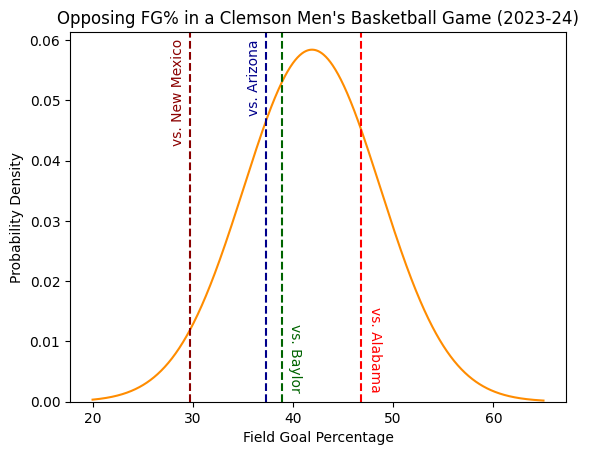

In [13]:
# Normal distribution for opposing FG% in a Clemson men's basketball game
x = np.linspace(20, 65, 1000)
y = norm.pdf(x, 41.9, 6.83)
plt.plot(x, y, color='darkorange')
plt.title("Opposing FG% in a Clemson Men's Basketball Game (2023-24)")
plt.xlabel('Field Goal Percentage')
plt.ylabel("Probability Density")
plt.ylim(0)
plt.axvline(x=29.7, color='darkred', linestyle='--')
plt.text(27.8, 0.043, 'vs. New Mexico', color='darkred', rotation=90)
plt.axvline(x=38.9, color='darkgreen', linestyle='--')
plt.text(39.5, 0.002, 'vs. Baylor', color='darkgreen', rotation=270)
plt.axvline(x=37.3, color='darkblue', linestyle='--')
plt.text(35.4, 0.048, 'vs. Arizona', color='darkblue', rotation=90)
plt.axvline(x=46.8, color='red', linestyle='--')
plt.text(47.5, 0.002, 'vs. Alabama', color='red', rotation=270)
plt.show()

### Clemson did hold their opponents to relatively low FG%s in March. Based on the distribution, these are the following probabilities for each game:
#### - 29.7 FG%: 0.037 (win)
#### - 38.9 FG%: 0.330 (win)
#### - 37.3 FG%: 0.250 (win)
#### - 46.8 FG%: 0.763 (loss)
### After performing an independent two-sample t-test based on the average FG% against Clemson in the regular season and playoffs, with a 90% confidence level, these values are statistically significant.
### However, we should also look at the teams Clemson beat, to see how they usually perform.

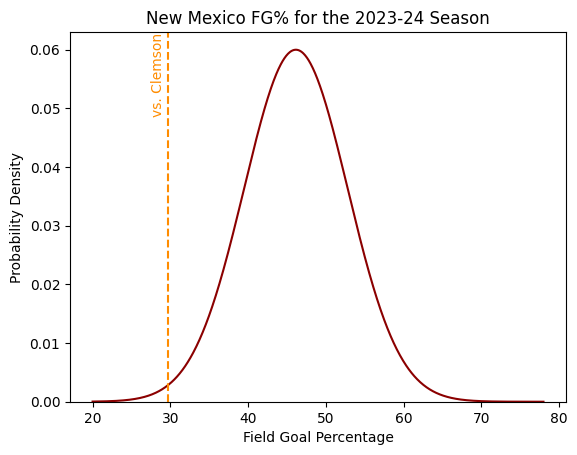

In [14]:
# Normal distribution for New Mexico FG% for the 2023-24 season (includes all games up to Clemson)
x = np.linspace(20, 78, 1000)
y = norm.pdf(x, 46.15, 6.652)
plt.plot(x, y, color='darkred')
plt.title("New Mexico FG% for the 2023-24 Season")
plt.xlabel('Field Goal Percentage')
plt.ylabel("Probability Density")
plt.ylim(0)
plt.axvline(x=29.7, color='darkorange', linestyle='--')
plt.text(27.5, 0.049, 'vs. Clemson', color='darkorange', rotation=90)
plt.show()

### Notes for New Mexico:
#### - Probability of shooting 29.7% based on the distribution: 0.0067
#### - New Mexico, in 34 regular season games, never shot worse in a match.
#### - Only 2 out of 64 teams shot worse in the first round of the playoffs: Colorado State (29.3 FG%) who had a First Four game, and 15-seed Saint Peter's (29.1 FG%)

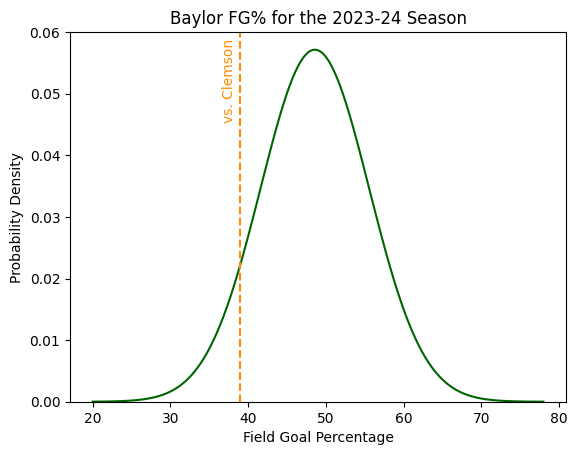

In [15]:
# Normal distribution for Baylor FG% for the 2023-24 season (includes all games up to Clemson)
x = np.linspace(20, 78, 1000)
y = norm.pdf(x, 48.591, 6.980)
plt.plot(x, y, color='darkgreen')
plt.title("Baylor FG% for the 2023-24 Season")
plt.xlabel('Field Goal Percentage')
plt.ylabel("Probability Density")
plt.ylim(0)
plt.axvline(x=38.9, color='darkorange', linestyle='--')
plt.text(36.6, 0.0458, 'vs. Clemson', color='darkorange', rotation=90)
plt.show()

### Notes for Baylor:
#### - Probability of shooting 38.9% based on the distribution: 0.082
#### - Baylor shot worse in just two games throughout 34 total matches, even with games against Iowa State, Kansas, Houston, and Duke.

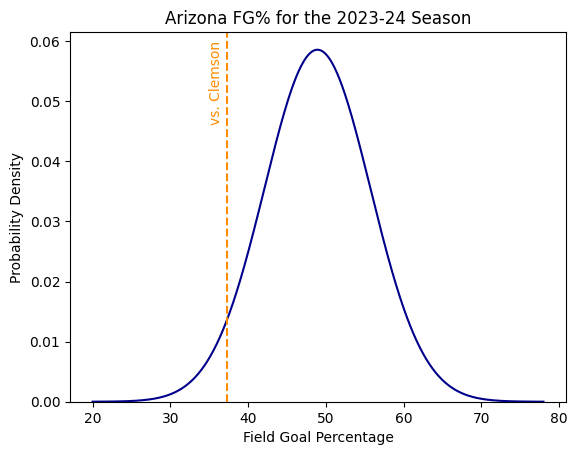

In [16]:
# Normal distribution for Arizona FG% for the 2023-24 season (includes all games up to Clemson)
x = np.linspace(20, 78, 1000)
y = norm.pdf(x, 48.923, 6.812)
plt.plot(x, y, color='darkblue')
plt.title("Arizona FG% for the 2023-24 Season")
plt.xlabel('Field Goal Percentage')
plt.ylabel("Probability Density")
plt.ylim(0)
plt.axvline(x=37.3, color='darkorange', linestyle='--')
plt.text(35, 0.0465, 'vs. Clemson', color='darkorange', rotation=90)
plt.show()

### Notes for Arizona:
#### - Probability of shooting 37.3% based on the distribution: 0.044
#### - Arizona shot worse in just one game throughout 36 total matches (34.7% against Washington State)
#### - Only 2 of 16 teams in the third round shot worse than Arizona did against Clemson


### Now let's look at 3PT%. The average 3PT% against Clemson in the regular season was 33.6%, with a standard deviation of 9.04%.
### Again, the Central Limit Theorem can be applied here and we can assume the distribution is approximately Normal.

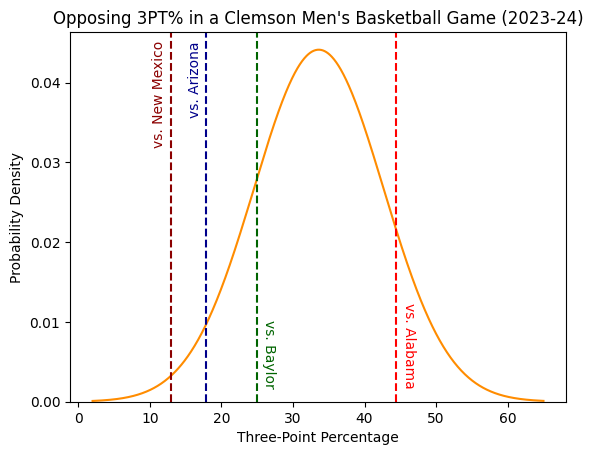

In [18]:
# Normal distribution for opposing 3PT% in a Clemson men's basketball game
x = np.linspace(2, 65, 1000)
y = norm.pdf(x, 33.6, 9.04)
plt.plot(x, y, color='darkorange')
plt.title("Opposing 3PT% in a Clemson Men's Basketball Game (2023-24)")
plt.xlabel('Three-Point Percentage')
plt.ylabel("Probability Density")
plt.ylim(0)
plt.axvline(x=13, color='darkred', linestyle='--')
plt.text(10.3, 0.0322, 'vs. New Mexico', color='darkred', rotation=90)
plt.axvline(x=25, color='darkgreen', linestyle='--')
plt.text(25.7, 0.002, 'vs. Baylor', color='darkgreen', rotation=270)
plt.axvline(x=17.9, color='darkblue', linestyle='--')
plt.text(15.4, 0.036, 'vs. Arizona', color='darkblue', rotation=90)
plt.axvline(x=44.4, color='red', linestyle='--')
plt.text(45.2, 0.002, 'vs. Alabama', color='red', rotation=270)
plt.show()

### Based on the distributions, the probabilities of these opposing 3PT%s are:
#### - 13.0 3PT%: 0.011 (win)
#### - 25.0 3PT%: 0.171 (win)
#### - 17.9 3PT%: 0.041 (win)
#### - 44.4 3PT%: 0.884 (loss)
### Moreover, throughout the entire regular season, no team had a lower 3PT% against Clemson than New Mexico did. Only one team who faced Clemson in the regular season had a lower 3PT% than Arizona, and only three teams shot worse from deep than Baylor.

### Let's take a further look at how Clemson's first three opponents usually perform when it comes to three-point shooting.

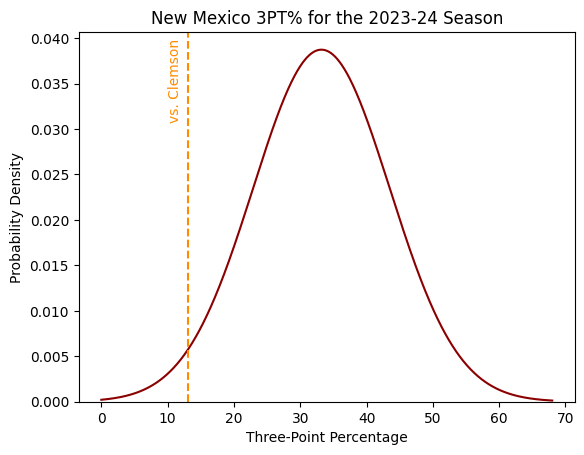

In [19]:
# Normal distribution for New Mexico 3PT% for the 2023-24 season (includes all games up to Clemson)
x = np.linspace(0, 68, 1000)
y = norm.pdf(x, 33.19, 10.30)
plt.plot(x, y, color='darkred')
plt.title("New Mexico 3PT% for the 2023-24 Season")
plt.xlabel('Three-Point Percentage')
plt.ylabel("Probability Density")
plt.ylim(0)
plt.axvline(x=13, color='darkorange', linestyle='--')
plt.text(10, 0.031, 'vs. Clemson', color='darkorange', rotation=90)
plt.show()

### Notes for New Mexico:
#### - Probability of shooting 13% based on the distribution: 0.025
#### - Again, New Mexico never went close to shooting this poorly from three in 34 regular season games.
#### - In the first round of March Madness, just one team shot worse from deep than New Mexico (Texas - 7.1%)

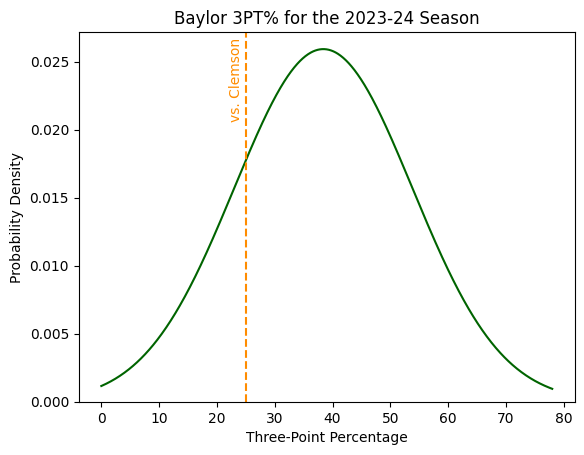

In [24]:
# Normal distribution for Baylor 3PT% for the 2023-24 season (includes all games up to Clemson)
x = np.linspace(0, 78, 1000)
y = norm.pdf(x, 38.40, 15.395)
plt.plot(x, y, color='darkgreen')
plt.title("Baylor 3PT% for the 2023-24 Season")
plt.xlabel('Three-Point Percentage')
plt.ylabel("Probability Density")
plt.ylim(0)
plt.axvline(x=25, color='darkorange', linestyle='--')
plt.text(22, 0.0208, 'vs. Clemson', color='darkorange', rotation=90)
plt.show()

### Notes for Baylor:
#### - Probability of shooting 25% based on the distribution: 0.192
#### - While Baylor's performance against Clemson was not horrible, it definitely was unusually low, as Baylor put up high 3PT%s (>40%) against ranked teams such as Duke, Iowa State, Kansas, Oklahoma, and Houston.
#### - Baylor only had 7 worse three-point performances out of 34 games, but only 2 of these games were losses for the Bears.

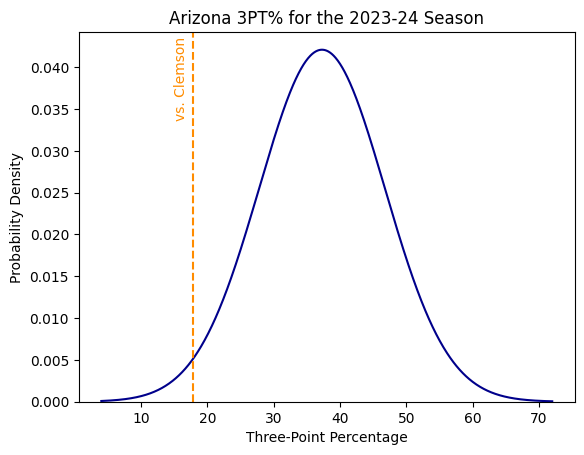

In [21]:
# Normal distribution for Arizona 3PT% for the 2023-24 season (includes all games up to Clemson)
x = np.linspace(4, 72, 1000)
y = norm.pdf(x, 37.28, 9.478)
plt.plot(x, y, color='darkblue')
plt.title("Arizona 3PT% for the 2023-24 Season")
plt.xlabel('Three-Point Percentage')
plt.ylabel("Probability Density")
plt.ylim(0)
plt.axvline(x=17.9, color='darkorange', linestyle='--')
plt.text(15, 0.034, 'vs. Clemson', color='darkorange', rotation=90)
plt.show()

### Notes for Arizona:
#### - Probability of shooting 17.9% based on the distribution: 0.020
#### - In 35 games before playing Clemson, Arizona never shot below 23% from three.
#### - In the Sweet Sixteen, just one team shot worse than Arizona (Marquette - 12.9%)

In [ ]:
# Use SciPy to run a two-sample t-test for mean
regSeason_opponentThreePercentage = [27.8, 40.9, 36.0, 30.4, 35.7, 31.4, 34.8, 33.3, 8.8, 15.4, 33.3, 36.4, 45.8, 34.8, 54.2, 40.0, 
                                     42.9, 22.2, 42.9, 10.0, 33.3, 33.3, 30.4, 37.5, 45.0, 28.6, 21.1, 28.0, 35.7, 36.4, 42.9, 34.5]
playoffs_opponentThreePercentage = [13.0, 25.0, 17.9]   # Does not include loss to Alabama
ttest_ind(regSeason_opponentThreePercentage, playoffs_opponentThreePercentage)

TtestResult(statistic=np.float64(2.5041706202539333), pvalue=np.float64(0.017394447382310357), df=np.float64(33.0))

## Overall, Clemson's playoff success came primarily from their ability to hold opponents to low shooting percentages, especially from deep.
### However, further research needs to be done on how Clemson did this and why their defense stepped up in the postseason. Let's go into a game-by-game analysis to explain how and why Clemson's defense stepped up.

## Round Of 64 - Clemson (6) vs. New Mexico (11)
### New Mexico entered the game as 2.5 point favorites, and were a popular 11 seed among fans regarding who might make a run.
### Clemson dominated the Lobos for basically the entire game, resulting in a 21 point win.
### The main story of this game involved Clemson locking up New Mexico's two highest-scoring players, Jamal Mashburn Jr. and Jaelen House.
### Mashburn, averaging 36.0 FG% and 31.7 3PT% that season, shot 1-11 from the floor against Clemson, including going 0-6 from the three-point line.
### House, averaging 43.4 FG% and 37.7 3PT% in 2023-24, shot 4-14 against Clemson and only made 2 threes out of 8 attempts.
### Clemson's starting guards Chase Hunter and Joseph Girrard III played excellent perimeter defense against these two, resulting in New Mexico putting up the fewest points in a game all season.
### While Gerrard's shooting was not great against New Mexico (2-12 FG, 2-8 3PT), his defense more than made up for it, and help from teammates on the offensive end propelled Clemson past the Lobos.
### By far, the player of the game was Chase Hunter, leading the team in points (21) and assists (6), while also nabbing two steals and guarding New Mexico's three-point specialists.

## Round of 32 - Clemson (6) vs. Baylor (3)
### Baylor were 4.5 point favorites in this matchup, even without guard Langston Love, a key rotation player.
### Again, Clemson's perimeter defense played a large role in their victory. While Ja'Kobe Walter (who now plays in the NBA) had a decent night from the three-point line (but still shot below his season 3PT% average), the same cannot be said for RayJ Dennis and Jayden Nunn.
### Dennis, who averaged 32.8 3PT% in the 2023-24 regular season, shot just 2-10 against Clemson, while Nunn, who averaged 43.9% last season, missed all 3 of his three-point attempts.
### Again, Chase Hunter led the Tigers in scoring with 20 points, shooting 50% from the floor and hitting 3 three-pointers. Hunter also primarily defended RayJ Dennis, displaying another fantastic defensive performance. Therefore, it is no doubt that he was the player of the game.
### However, Clemson bench forwards RJ Godfrey and Chauncey Wiggins deserve credit for being great replacements for star center PJ Hall. Hall performed well during the postseason but found himself in foul trouble quite often, leading to fewer minutes in March.

## Sweet Sixteen - Clemson (6) vs. Arizona (2)
### Arizona were 7.5 point favorites for this one, and the over/under was 152.5. With a final score of 77-72, every Clemson postseason game now has gone under the projected total.
### Again, Clemson's perimeter defense was integral to their victory, with Arizona star Caleb Love shooting 0-9 from beyond the arc.
### Arizona's starters could barely get any three-pointers to go, shooting a combined 2-23 (8.7%).
### While Chase Hunter again had an incredible performance, all of Clemson's players can be credited with this win. Ian Schieffelin's had another great game both on offense and defense, and PJ Hall limited his fouling and was very efficient from close range.
### Clemson didn't need much help from the bench to get this win, but Arizona's bench was the reason this game was even close. Bench guards Jaden Bradley and KJ Lewis were the only backcourt players to have decent performances. Starter Oumar Ballo also did well for Arizona, but in the end, Arizona's poor shooting sent them home in the third round without ever leading against Clemson.

## Elite Eight - Clemson (6) vs. Alabama (4)
### Alabama were 2.5 point favorites, despite Clemson winning as underdogs in their first three matches.
### Clemson lost this game mainly because they failed to continue to do what they did against their first three opponents: defend the three-pointer. Three players from Alabama shot at least 50% for three. Mark Sears led the avalanche of threes, going 7-14 and scoring 23 points, the most in the game.
### The only Tiger to make more than one three-pointer was Joseph Girard III, who made 5 out of 10 attempts, and led the team in scoring with 19 points.
### Clemson, having trailed for just 52 total seconds in the first three rounds, never saw a lead after just 1:08 after the second half against Alabama started.
### Alabama's 16 offensive rebounds resulted in 15 second-chance points, implying that if Clemson practiced better boxing out and rebounding, they could have been in the Final Four. PJ Hall, being 6 ft. 10 in. tall, had more turnovers (5) than rebounds (4).
### Clemson's 13-point lead with 7:56 left in the first half was the largest blown lead for them all season.
### Overall, rebounding and perimeter defense is what changed in this game for Clemson. There was no issue with coaching, but Clemson may have gotten overconifdent after building a large lead early. This game was disappointing for Clemson, as they could have had their first ever Final Four appearance had they played a little better against the four seed.

## Conclusions
### Clemson's perimeter defense was the primary reason for their success in the NCAA tournament. However, preventing second-chance points should also be credited.
### Bench players such as RJ Godfrey and Chauncey Wiggins performed well when substituted in for PJ Hall and other players who had tendencies to get into foul trouble.
### Chase Hunter was the player of the tournament, portraying excellent performances both offensively and defensively.